In [1]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/Machine_Learning_for_Time_Series_Data_in_Python/datasets/'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_plot_and_make_titles():
   axs[0, 0].set(title="Normal Heartbeats")
   axs[0, 1].set(title="Abnormal Heartbeats")
   plt.tight_layout()
   plt.show()

In [11]:
normal = pd.read_csv(path_data + 'normal_full.csv').drop('time',axis = 1).values
abnormal = pd.read_csv(path_data + 'abnormal_full.csv').drop('time',axis = 1).values
sfreq = 2205

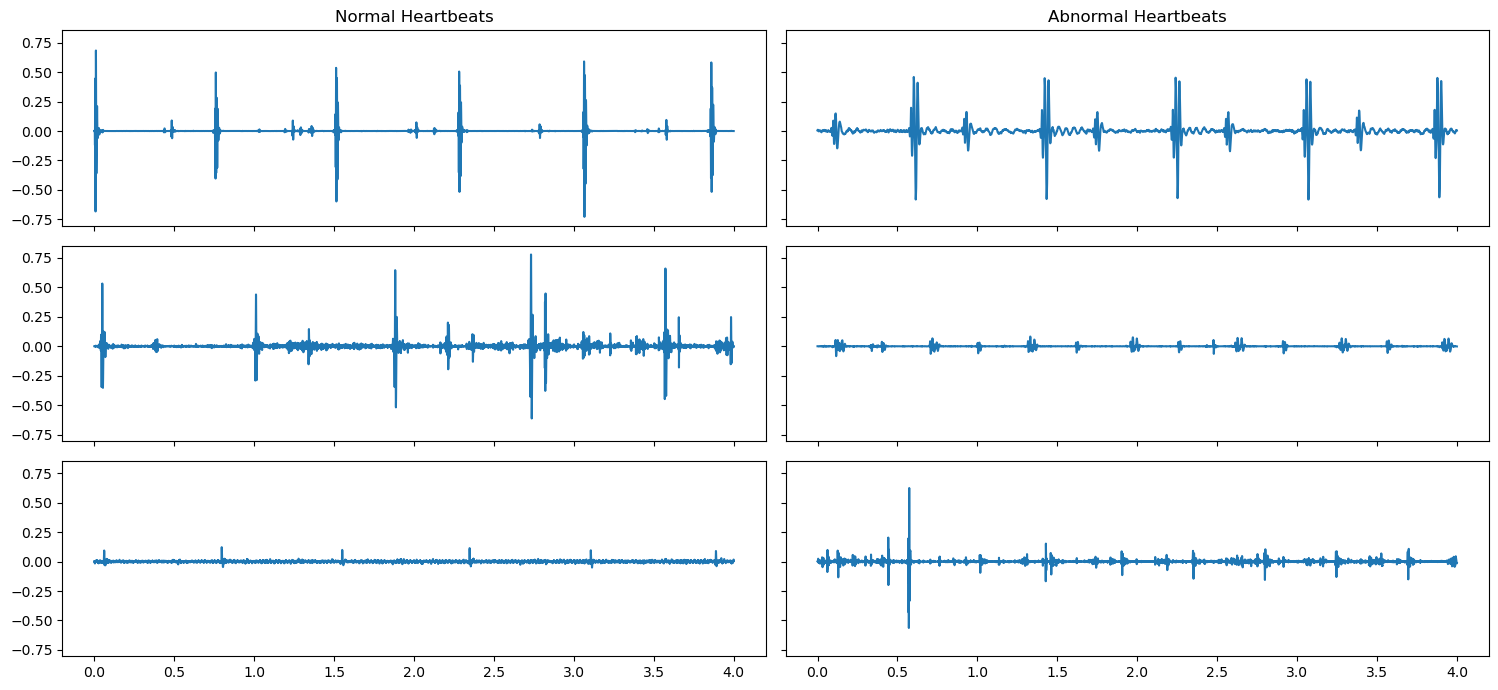

"\nCorrect! As you can see there is a lot of variability in the raw data, let's see if you can average out some of that noise to notice a difference.\n"

In [12]:
# exercise 01

"""
Many repetitions of sounds

In this exercise, you'll start with perhaps the simplest classification technique: averaging across dimensions of a dataset and visually inspecting the result.

You'll use the heartbeat data described in the last chapter. Some recordings are normal heartbeat activity, while others are abnormal activity. Let's see if you can spot the difference.

Two DataFrames, normal and abnormal, each with the shape of (n_times_points, n_audio_files) containing the audio for several heartbeats are available in your workspace. Also, the sampling frequency is loaded into a variable called sfreq. A convenience plotting function show_plot_and_make_titles() is also available in your workspace.
"""

# Instructions

"""

    First, create the time array for these audio files (all audios are the same length).
    Then, stack the values of the two DataFrames together (normal and abnormal, in that order) so that you have a single array of shape (n_audio_files, n_times_points).
    Finally, use the code provided to loop through each list item / axis, and plot the audio over time in the corresponding axis object.
    You'll plot normal heartbeats in the left column, and abnormal ones in the right column

"""

# solution

fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(normal.shape[0]) / sfreq

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()

#----------------------------------#

# Conclusion

"""
Correct! As you can see there is a lot of variability in the raw data, let's see if you can average out some of that noise to notice a difference.
"""

In [14]:
time = pd.read_csv(path_data + 'normal_full.csv', usecols = ['time']).values

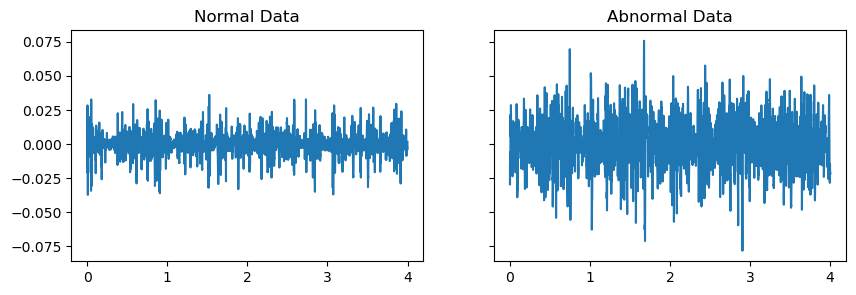

"\nCorrect! Do you see a noticeable difference between the two? Maybe, but it's quite noisy. Let's see how you can dig into the data a bit further.\n"

In [15]:
# exercise 02

"""
Invariance in time

While you should always start by visualizing your raw data, this is often uninformative when it comes to discriminating between two classes of data points. Data is usually noisy or exhibits complex patterns that aren't discoverable by the naked eye.

Another common technique to find simple differences between two sets of data is to average across multiple instances of the same class. This may remove noise and reveal underlying patterns (or, it may not).

In this exercise, you'll average across many instances of each class of heartbeat sound.

The two DataFrames (normal and abnormal) and the time array (time) from the previous exercise are available in your workspace.
"""

# Instructions

"""

    Average across the audio files contained in normal and abnormal, leaving the time dimension.
    Visualize these averages over time.

"""

# solution

# Average across the audio files of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time, mean_normal)
ax1.set(title="Normal Data")
ax2.plot(time, mean_abnormal)
ax2.set(title="Abnormal Data")
plt.show()

#----------------------------------#

# Conclusion

"""
Correct! Do you see a noticeable difference between the two? Maybe, but it's quite noisy. Let's see how you can dig into the data a bit further.
"""

In [61]:
normal = pd.read_csv(path_data + 'normal_full.csv').drop('time',axis = 1)
abnormal = pd.read_csv(path_data + 'abnormal_full.csv').drop(['time','29','30'],axis = 1)

normal.columns = np.arange(len(normal.columns))
abnormal.columns = np.arange(len(abnormal.columns))

normal['target'] = 'normal'
abnormal['target'] = 'abnormal'

df = pd.concat([normal,abnormal])

In [62]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis = 1)
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [63]:
# exercise 03

"""
Build a classification model

While eye-balling differences is a useful way to gain an intuition for the data, let's see if you can operationalize things with a model. In this exercise, you will use each repetition as a datapoint, and each moment in time as a feature to fit a classifier that attempts to predict abnormal vs. normal heartbeats using only the raw data.

We've split the two DataFrames (normal and abnormal) into X_train, X_test, y_train, and y_test.
"""

# Instructions

"""

    Create an instance of the Linear SVC model and fit the model using the training data.
    Use the testing data to generate predictions with the model.
    Score the model using the provided code.

"""

# solution

from sklearn.svm import LinearSVC

# Initialize and fit the model
model = LinearSVC()
model.fit(X_train, y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))

#----------------------------------#

# Conclusion

"""
Correct! Note that your predictions didn't do so well. That's because the features you're using as inputs to the model (raw data) aren't very good at differentiating classes. Next, you'll explore how to calculate some more complex features that may improve the results.
"""

0.4954648526077097


"\nCorrect! Note that your predictions didn't do so well. That's because the features you're using as inputs to the model (raw data) aren't very good at differentiating classes. Next, you'll explore how to calculate some more complex features that may improve the results.\n"

In [67]:
audio = pd.read_csv(path_data + 'audio.csv')['0']
audio

0      -0.024684
1      -0.060429
2      -0.070080
3      -0.084212
4      -0.085111
          ...   
2200   -0.002137
2201   -0.001781
2202   -0.001656
2203   -0.002624
2204   -0.003488
Name: 0, Length: 2205, dtype: float64

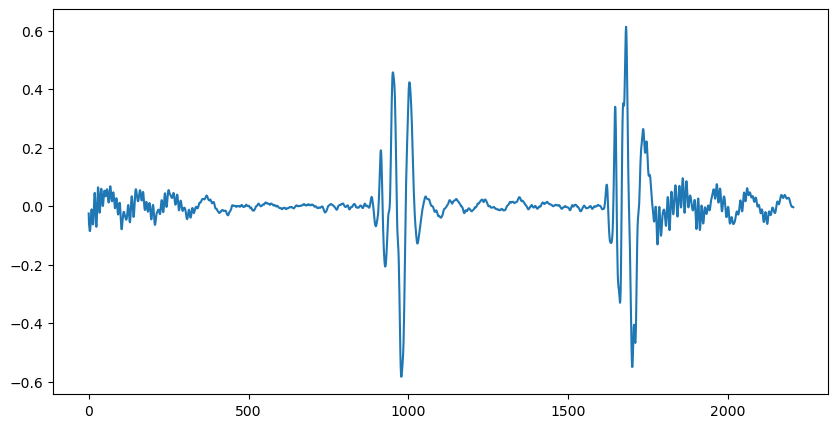

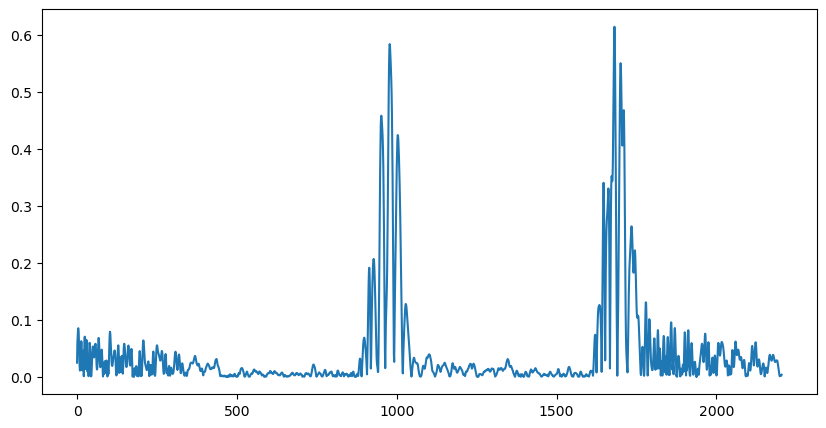

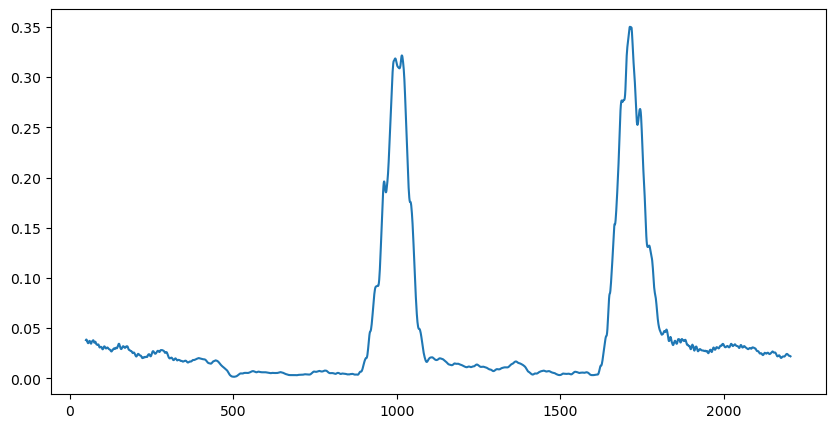

"\nYes! By calculating the envelope of each sound and smoothing it, you've eliminated much of the noise and have a cleaner signal to tell you when a heartbeat is happening.\n"

In [68]:
# exercise 04

"""
Calculating the envelope of sound

One of the ways you can improve the features available to your model is to remove some of the noise present in the data. In audio data, a common way to do this is to smooth the data and then rectify it so that the total amount of sound energy over time is more distinguishable. You'll do this in the current exercise.

A heartbeat file is available in the variable audio.
"""

# Instructions

"""
Visualize the raw audio you'll use to calculate the envelope.
---

    Rectify the audio.
    Plot the result.
---

    Smooth the audio file by applying a rolling mean.
    Plot the result.

"""

# solution

# Plot the raw data first
audio.plot(figsize=(10, 5))
plt.show()

#----------------------------------#

# Rectify the audio signal
audio_rectified = audio.apply(abs)

# Plot the result
audio_rectified.plot(figsize=(10, 5))
plt.show()

#----------------------------------#

# Smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# Plot the result
audio_rectified_smooth.plot(figsize=(10, 5))
plt.show()

#----------------------------------#

# Conclusion

"""
Yes! By calculating the envelope of each sound and smoothing it, you've eliminated much of the noise and have a cleaner signal to tell you when a heartbeat is happening.
"""

In [76]:
labels = np.array([['murmur'],
       ['murmur'],
       ['murmur'],
       ['normal'],
       ['normal'],
       ['murmur'],
       ['normal'],
       ['normal'],
       ['murmur'],
       ['murmur'],
       ['normal'],
       ['murmur'],
       ['normal'],
       ['murmur'],
       ['murmur'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['murmur'],
       ['normal'],
       ['normal'],
       ['murmur'],
       ['murmur'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['murmur'],
       ['murmur'],
       ['murmur'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['murmur'],
       ['murmur'],
       ['murmur'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['murmur'],
       ['murmur'],
       ['normal'],
       ['murmur'],
       ['murmur'],
       ['murmur'],
       ['murmur'],
       ['normal'],
       ['normal'],
       ['murmur'],
       ['normal'],
       ['normal'],
       ['murmur'],
       ['murmur'],
       ['normal'],
       ['murmur'],
       ['murmur'],
       ['murmur'],
       ['murmur']])

In [87]:
pd.read_csv(path_data +'targets.csv')

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,116,6.5,3.0,5.5,1.8,2
1,142,5.8,2.7,5.1,1.9,2
2,148,6.2,3.4,5.4,2.3,2
3,67,5.8,2.7,4.1,1.0,1
4,133,6.3,2.8,5.1,1.5,2
5,107,7.3,2.9,6.3,1.8,2
6,136,6.3,3.4,5.6,2.4,2
7,147,6.5,3.0,5.2,2.0,2
8,146,6.3,2.5,5.0,1.9,2
9,97,6.2,2.9,4.3,1.3,1


In [92]:
# exercise 05

"""
Calculating features from the envelope

Now that you've removed some of the noisier fluctuations in the audio, let's see if this improves your ability to classify.

audio_rectified_smooth from the previous exercise is available in your workspace.
"""

# Instructions

"""

    Calculate the mean, standard deviation, and maximum value for each heartbeat sound.
    Column stack these stats in the same order.
    Use cross-validation to fit a model on each CV iteration.

"""

# solution

# Calculate stats
means = np.mean(audio_rectified_smooth, axis=0)
stds = np.std(audio_rectified_smooth, axis=0)
maxs = np.max(audio_rectified_smooth, axis=0)

# Create the X and y arrays
#X = np.column_stack([means, stds, maxs])
#y = labels.reshape(-1, 1)

X = pd.read_csv(path_data + 'X_smooth.csv')
y = pd.read_csv(path_data + 'y_smooth.csv').values.ravel()

# Fit the model and score on testing data
from sklearn.model_selection import cross_val_score
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

#----------------------------------#

# Conclusion

"""
Correct! This model is both simpler (only 3 features) and more understandable (features are simple summary statistics of the data).
"""

0.7166666666666667


'\nCorrect! This model is both simpler (only 3 features) and more understandable (features are simple summary statistics of the data).\n'

In [93]:
import librosa as lr

In [96]:
normal = pd.read_csv(path_data + 'normal_full.csv')
abnormal = pd.read_csv(path_data + 'abnormal_full.csv').drop(['29','30'],axis = 1)

normal.columns = np.arange(len(normal.columns))
abnormal.columns = np.arange(len(abnormal.columns))

normal['target'] = 'normal'
abnormal['target'] = 'abnormal'

audio = pd.concat([normal,abnormal])

In [114]:
%pip install tables

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached Cython-0.29.35-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.5/383.5 kB 1.8 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 5.4 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


In [119]:
key_data = pd.read_hdf(path_data + 'audio_munged.hdf5', key='h5io/key_data')
audio = key_data.squeeze()

In [139]:
audio_rectified = audio.apply(np.abs)
audio_rectified_smooth = audio_rectified.rolling(50).mean()

In [157]:
means = np.mean(audio_rectified_smooth.values, axis = 0)
stds = np.std(audio_rectified_smooth.values, axis = 0)
maxs = np.max(audio_rectified_smooth.values, axis = 0)

In [171]:
model = LinearSVC(max_iter = 0)

In [175]:
# exercise 06

"""
Derivative features: The tempogram

One benefit of cleaning up your data is that it lets you compute more sophisticated features. For example, the envelope calculation you performed is a common technique in computing tempo and rhythm features. In this exercise, you'll use librosa to compute some tempo and rhythm features for heartbeat data, and fit a model once more.

Note that librosa functions tend to only operate on numpy arrays instead of DataFrames, so we'll access our Pandas data as a Numpy array with the .values attribute.
"""

# Instructions

"""

    Use librosa to calculate a tempogram of each heartbeat audio.
    Calculate the mean, standard deviation, and maximum of each tempogram (this time using DataFrame methods)
---

    Column stack these tempo features (mean, standard deviation, and maximum) in the same order.
    Score the classifier with cross-validation.

"""

# solution

# Calculate the tempo of the sounds
tempos = []
for col, i_audio in audio.items():
    temp, beats = lr.beat.beat_track(y = i_audio.values, sr=sfreq, hop_length=2**6)
    tempos.append(temp)


# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos).reshape(-1,1)

# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)

#----------------------------------#

# Create the X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_std, tempos_max])
X = np.nan_to_num(X)
y = labels.reshape(-1, 1).ravel()

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5, n_jobs = -1, verbose = 1)
print(np.mean(percent_score))

#----------------------------------#

# Conclusion

"""
Correct! Note that your predictive power may not have gone up (because this dataset is quite small), but you now have a more rich feature representation of audio that your model can use!
"""

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.5166666666666667


/home/nero/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/nero/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.4s
/home/nero/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/nero/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/nero/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   5 out of 

'\nCorrect! Note that your predictive power may not have gone up (because this dataset is quite small), but you now have a more rich feature representation of audio that your model can use!\n'

In [192]:
audio[0].values.shape

(8820,)

/tmp/ipykernel_37763/2302336261.py:39: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spec_db = amplitude_to_db(spec)


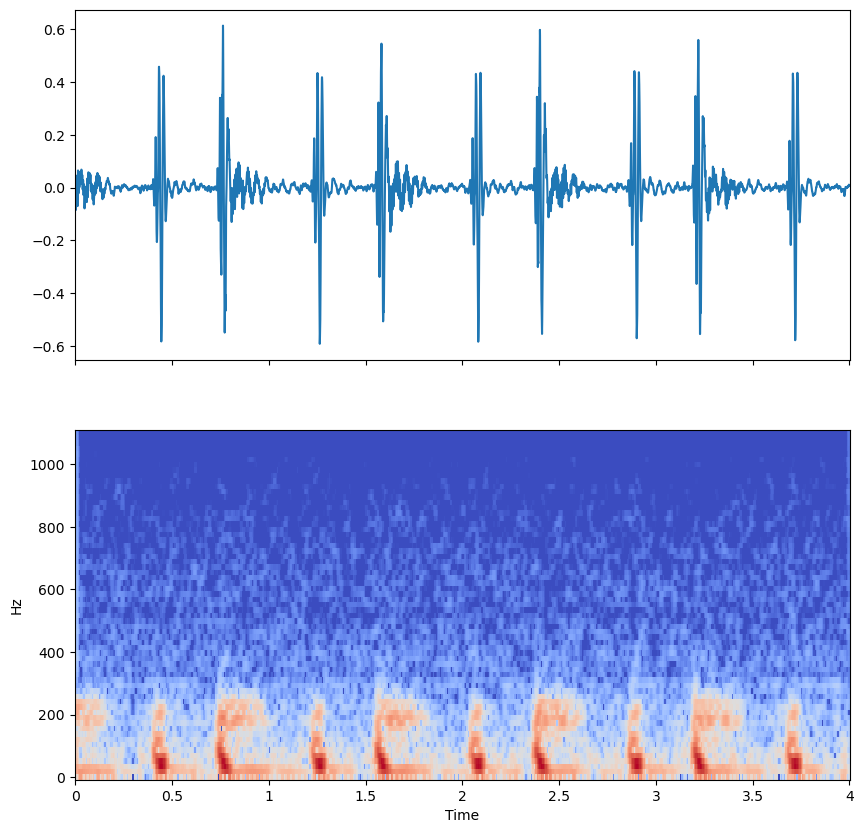

'\nNicely done! Do you notice that the heartbeats come in pairs, as seen by the vertical lines in the spectrogram?\n'

In [195]:
# exercise 07

"""
Spectrograms of heartbeat audio

Spectral engineering is one of the most common techniques in machine learning for time series data. The first step in this process is to calculate a spectrogram of sound. This describes what spectral content (e.g., low and high pitches) are present in the sound over time. In this exercise, you'll calculate a spectrogram of a heartbeat audio file.

We've loaded a single heartbeat sound in the variable audio.
"""

# Instructions

"""

    Import the short-time fourier transform (stft) function from librosa.core.
    Calculate the spectral content (using the short-time fourier transform function) of audio.
---

    Convert the spectogram (spec) to decibels.
    Visualize the spectogram.

"""

# solution

# Import the stft function
from librosa.core import stft

# Prepare the STFT
HOP_LENGTH = 2**4
spec = stft(audio[0].values, hop_length=HOP_LENGTH, n_fft=2**7)

#----------------------------------#

from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert into decibels
spec_db = amplitude_to_db(spec)
# Compare the raw audio to the spectrogram of the audio
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(audio.index, audio[0].values)
specshow(spec_db, sr=2205, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH, ax=axs[1])
plt.show()

#----------------------------------#

# Conclusion

"""
Nicely done! Do you notice that the heartbeats come in pairs, as seen by the vertical lines in the spectrogram?
"""

In [200]:
spec = np.absolute(spec.astype(np.float32))

/tmp/ipykernel_37763/686486023.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  spec = np.absolute(spec.astype(np.float32))


In [202]:
times_spec = time[::HOP_LENGTH]

ValueError: 'x' is not 1-dimensional

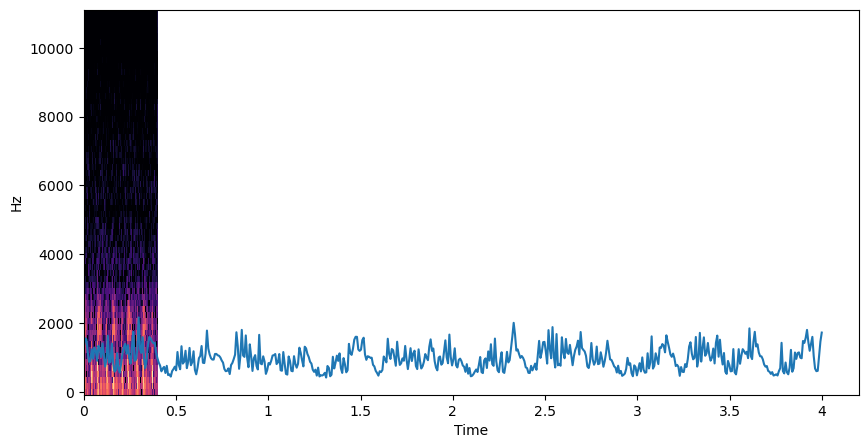

In [203]:
# exercise 08

"""
Engineering spectral features

As you can probably tell, there is a lot more information in a spectrogram compared to a raw audio file. By computing the spectral features, you have a much better idea of what's going on. As such, there are all kinds of spectral features that you can compute using the spectrogram as a base. In this exercise, you'll look at a few of these features.

The spectogram spec from the previous exercise is available in your workspace.
"""

# Instructions

"""
Calculate the spectral bandwidth as well as the spectral centroid of the spectrogram by using functions in librosa.feature.
---

    Convert the spectrogram to decibels for visualization.
    Plot the spectrogram over time.

"""

# solution

import librosa as lr

# Calculate the spectral centroid and bandwidth for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=spec)[0]
centroids = lr.feature.spectral_centroid(S=spec)[0]

#----------------------------------#

from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert spectrogram to decibels for visualization
spec_db = amplitude_to_db(spec)

# Display these features on top of the spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
specshow(spec_db, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH, ax=ax)
ax.plot(times_spec, centroids)
ax.fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
ax.set(ylim=[None, 6000])
plt.show()

#----------------------------------#

# Conclusion

"""
Good job! As you can see, the spectral centroid and bandwidth characterize the spectral content in each sound over time. They give us a summary of the spectral content that we can use in a classifier.
"""

In [ ]:
for x, y in audio.items():
    print(x, y[1])

In [220]:
cols_list = [col_values.to_numpy() for _, col_values in audio.items()]

HOP_LENGTH = 2**4
SIZE_WINDOW = 2**7

def mySTFT(col_data, H_L =HOP_LENGTH, S_Z = SIZE_WINDOW):
    col_spec = stft(col_data, hop_length= H_L, n_fft= S_Z)
    return np.abs(col_spec.astype(np.float32))

# mySTFT(cols_list[0])

spectrograms = [ mySTFT(col) for col in cols_list]

/tmp/ipykernel_37763/2579235483.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.abs(col_spec.astype(np.float32))


In [226]:
# exercise 09

"""
Combining many features in a classifier

You've spent this lesson engineering many features from the audio data - some contain information about how the audio changes in time, others contain information about the spectral content that is present.

The beauty of machine learning is that it can handle all of these features at the same time. If there is different information present in each feature, it should improve the classifier's ability to distinguish the types of audio. Note that this often requires more advanced techniques such as regularization, which we'll cover in the next chapter.

For the final exercise in the chapter, we've loaded many of the features that you calculated before. Combine all of them into an array that can be fed into the classifier, and see how it does.
"""

# Instructions

"""
Loop through each spectrogram, calculating the mean spectral bandwidth and centroid of each.
---

    Column stack all the features to create the array X.
    Score the classifier with cross-validation.

"""

# solution

# Loop through each spectrogram
bandwidths = []
centroids = []

for spec in spectrograms:
    # Calculate the mean spectral bandwidth
    this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=spec))
    # Calculate the mean spectral centroid
    this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=spec))
    # Collect the values
    bandwidths.append(this_mean_bandwidth)  
    centroids.append(this_mean_centroid)

#----------------------------------#

# Create X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_max, tempos_std, bandwidths, centroids])
X = np.nan_to_num(X)
y = labels.reshape(-1, 1)

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5, n_jobs = -1)
print(np.mean(percent_score))

#----------------------------------#

# Conclusion

"""
Good job! You calculated many different features of the audio, and combined each of them under the assumption that they provide independent information that can be used in classification. You may have noticed that the accuracy of your models varied a lot when using different set of features. This chapter was focused on creating new "features" from raw data and not obtaining the best accuracy. To improve the accuracy, you want to find the right features that provide relevant information and also build models on much larger data.
"""

0.5166666666666667


/home/nero/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/nero/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/nero/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/nero/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/nero/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


'\nGood job! You calculated many different features of the audio, and combined each of them under the assumption that they provide independent information that can be used in classification. You may have noticed that the accuracy of your models varied a lot when using different set of features. This chapter was focused on creating new "features" from raw data and not obtaining the best accuracy. To improve the accuracy, you want to find the right features that provide relevant information and also build models on much larger data.\n'